<a href="https://colab.research.google.com/github/arslanaminn/internship/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import pytesseract

In [56]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
detector = dlib.get_frontal_face_detector()
image1 = cv2.imread("/content/CNIC 10kb.jpeg")

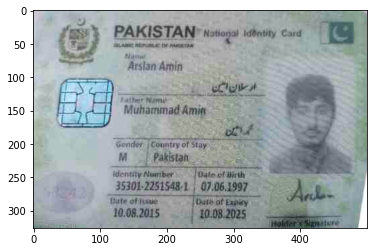

In [58]:
plt.imshow(image1)

In [59]:
resize_img = cv2.resize(image1, None, fx=7, fy=7, interpolation=cv2.INTER_LINEAR)

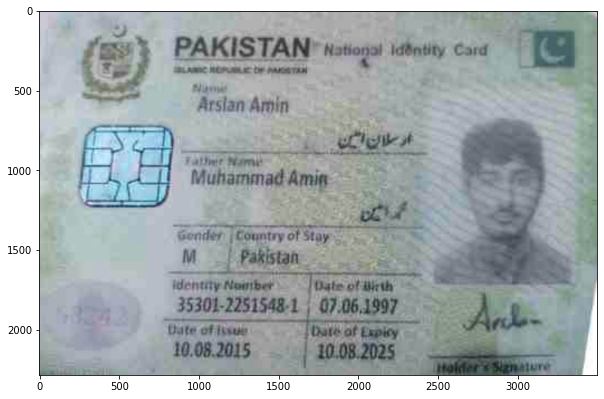

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(resize_img)

In [61]:
dets = detector(resize_img, 1)

In [62]:
dets

rectangles[[(2710, 965) (3172, 1427)]]

In [63]:
# loop over detected faces
for face in dets:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y
    # draw box over face
    cv2.rectangle(resize_img, (x,y), (x+w,y+h), (0,255,0), 5)

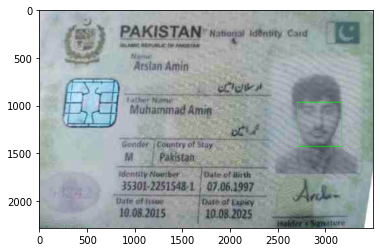

In [64]:
plt.imshow(resize_img)

In [65]:
print(x, x+w, y,y+h)

2710 3172 965 1427


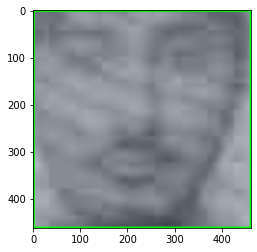

In [66]:
for face in dets:
    x = face.left()
    y = face.top()
    w = face.right() - x
    h = face.bottom() - y
    # draw box over face
    new_img = resize_img[y:y+h, x:x+w]
    plt.imshow(new_img)
    plt.show()

In [67]:
import pytesseract
import shutil
import os
import random


In [68]:
image_path_in_colab=resize_img

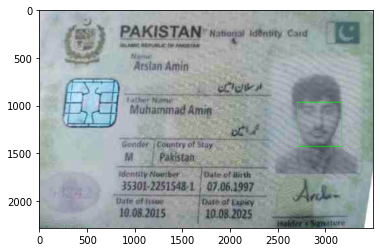

In [69]:
plt.imshow(image_path_in_colab)

In [70]:
img_rgb = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))

   
      

Ne ROPUELE OF Rasen Taal
Pd pt tye!

Arsian Amin

(8) PAKISTAN to ty cw Tf

ih Ls be tl | a : __ : ~ ir |



In [71]:
extractedInformation = pytesseract.image_to_string(image_path_in_colab, lang='eng')
print(extractedInformation)

   
      

Ne ROPUELE OF Anson TAs
Pd pv tye!

Arsian Amin

(8) PAKISTAN to ty cw wf

ee Ls be ll | a : _ : ~ ir |



In [72]:
# Get bounding box estimates
print(pytesseract.image_to_boxes(image_path_in_colab))

~ 243 1881 377 2124 0
~ 3373 1916 3374 2184 0
~ 243 1584 995 1740 0
~ 243 0 3362 1584 0
~ 243 1782 737 1881 0
~ 243 1740 737 1782 0
~ 1568 1584 3362 1740 0
N 847 1890 1054 1933 0
e 944 1890 1021 1933 0
R 1070 1886 1122 1947 0
O 1089 1886 1154 1947 0
P 1128 1886 1192 1947 0
U 1070 1888 1338 1936 0
E 1191 1886 1255 1947 0
L 1222 1886 1287 1947 0
E 1345 1886 1683 1947 0
O 1336 1875 1388 1951 0
F 1362 1875 1413 1951 0
A 1419 1886 1483 1947 0
n 1463 1886 1502 1947 0
s 1482 1886 1521 1947 0
o 1501 1886 1553 1947 0
n 1552 1886 1578 1947 0
T 1577 1875 1603 1951 0
A 1596 1875 1648 1951 0
s 1621 1875 1673 1951 0
P 967 1779 994 1822 0
d 992 1771 1017 1827 0
p 1026 1769 1063 1812 0
v 1070 1778 1088 1807 0
t 1090 1758 1103 1831 0
y 1096 1778 1114 1807 0
e 1119 1769 1162 1805 0
! 1162 1786 1175 1811 0
A 995 1653 1062 1749 0
r 1013 1648 1106 1749 0
s 1062 1649 1148 1722 0
i 1152 1649 1178 1749 0
a 1176 1651 1233 1722 0
n 1230 1648 1290 1722 0
A 1319 1639 1402 1750 0
m 1319 1640 1479 1747 0
i 1424 163

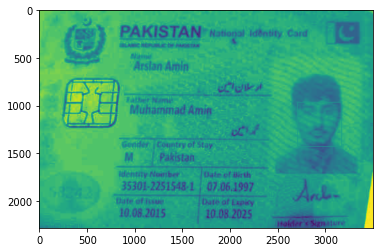

In [73]:
gray = cv2.cvtColor(image_path_in_colab, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [74]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [75]:
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

In [76]:
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [77]:
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

In [78]:
im2 = resize_img.copy()

In [79]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

In [80]:
  # Drawing a rectangle on copied image
rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

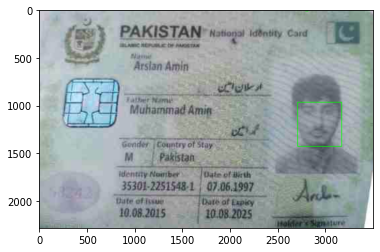

In [81]:
plt.imshow(rect)

In [82]:
 # Cropping the text block for giving input to OCR
cropped = im2[y:y + h, x:x + w]
     

In [83]:
text = pytesseract.image_to_string(cropped)

In [84]:
#ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU |cv2.THRESH_BINARY_INV)
#cv2.imwrite('threshold_image.jpg',thresh1)

In [85]:
#rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))

In [86]:
#dilation = cv2.dilate(thresh1, rect_kernel, iterations = 3)
#cv2.imwrite('dilation_image.jpg',dilation)

In [87]:
#plt.imshow(dilation)

In [88]:
#contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                           # cv2.CHAIN_APPROX_NONE)

In [89]:
#im2 = image_path_in_colab.copy()

In [91]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Draw the bounding box on the text area
    rect=cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Crop the bounding box area
    cropped = im2[y:y + h, x:x + w]
    
    cv2.imwrite('rectanglebox.jpg',rect)
     
    # open the text file
    file = open("text_output2.txt", "a")
     
    # Using tesseract on the cropped image area to get text
    text = pytesseract.image_to_string(cropped)
     
    # Adding the text to the file
    file.write(text)
    file.write("\n")
     
    # Closing the file
    file.close